 Sine,Cosine,Square,Sawtooth,Noise generation - Max Wang

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio 


In [20]:
def sinewave(sr,duration,freq, phase):
    #First Sinewave
    A = 10
 
    #duration is not affecting sr, 
                #it is the length of the sample 
                #that will be graphed   
    #Time Vector 
    n = np.arange(0,duration,1/sr)   #1/48000

    #Sinewave equation 
    sine_1 = A * np.sin(2*np.pi*freq*n + phase)

    print(sine_1)
    print(sr)
     
    return n, sine_1
    

n, sine_1 = sinewave(48000, 1, 440, 0)

[ 0.          0.57564027  1.1493715  ... -1.719291   -1.1493715
 -0.57564027]
48000


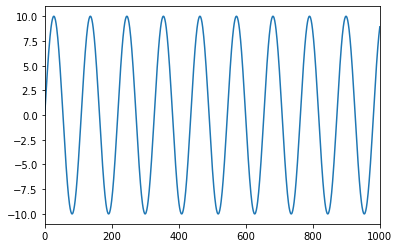

In [51]:
#plot audio
plt.plot(sine_1)
plt.xlim(0,1000)
#display audio 
Audio(sine_1,rate = 48000)

In [25]:
def cosinewave(sr,duration,freq, phase):
# Cosine Wave
    A = 10
    #freq = 1000
    #phase = np.pi/2.0
    #duration = 1    #duration is not affecting sr, 
                #it is the length of the sample 
                #that will be graphed
    sr = 48000
#Time Vector 
    n = np.arange(0,duration,1/sr)   #1/48000

    

#cosine wave equation 
    cos_1 = A * np.sin(2*np.pi*freq*n + phase)
    
    print(cos_1)
    print(sr)

    return n, cos_1

n, cos_1 = cosinewave(48000, 1, 220, 0)

    #sin1=Asin(2pi*freq*t+phase) #continuous time 



[ 0.          0.28793952  0.57564027 ... -0.86286366 -0.57564027
 -0.28793952]
48000


(0.0, 200.0)

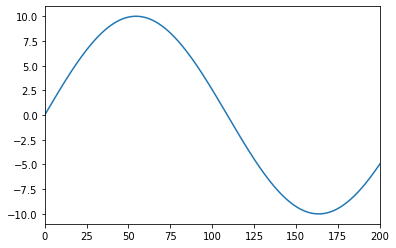

In [52]:
Audio(cos_1,rate = 48000)
plt.plot(cos_1)
plt.xlim(0,200)

In [76]:

#squarewave 

A = .1
freq = 50
phase = 0
duration = 1 
sr = 48000
#Time Vector 
n = np.arange(0,duration,1/sr)   #1/48000

num_overtones = 2000

square_wave = np.zeros(duration * sr)

for k in range(1, (num_overtones+1)*2,2):

#squarewave equation
    square_wave = square_wave + A/k * np.sin(2*np.pi*freq*k*n+ phase)
    

    

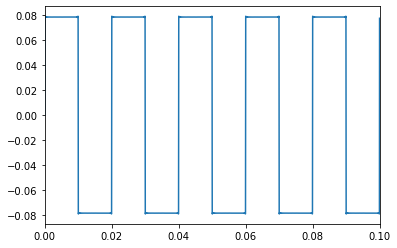

In [79]:
plt.plot(n,square_wave)
plt.xlim([0,.1])
Audio(square_wave, rate=48000)

In [80]:
def tri_wave(sr,duration,freq,num_overtones,phase):

    A = 10
   
    
    #Time Vector 
    n = np.arange(0,duration,1/sr)   #1/48000
    
    tri_1 = np.zeros(duration * sr)

    for k in range(1, (num_overtones+1)*2, 2):

        #triangle wave equation 
        tri_1 =  tri_1 + A * (-1)**((k-1)/2)/k**2 * np.sin(2*np.pi*freq*k*n+ phase)
                          
    return n, tri_1

n2, tri_1 = tri_wave(48000, 1, 50, 2000, 0)

# print (n2)
# print (tri_1)
# print (sr)


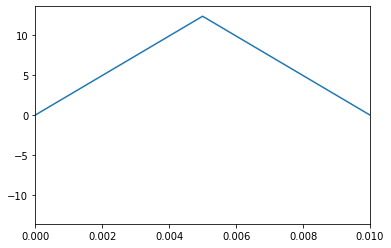

In [81]:
plt.plot(n,tri_1)
plt.xlim([0,0.01])
Audio(tri_1, rate=48000)

In [83]:
def sawtooth_wave(sr,duration,freq,num_overtones,phase):

    A = 10
   
    
    #Time Vector 
    n = np.arange(0,duration,1/sr)   #1/48000
    
    sawtooth_2 = np.zeros(duration * sr)

    for k in range(1, (num_overtones+1)*2,1):

        #triangle wave equation 
        sawtooth_2 =  sawtooth_2 - A / k * np.sin(2*np.pi*freq*k*n+ phase)
                          
    return n, sawtooth_2

n2, sawtooth_2 = sawtooth_wave(48000, 2, 30, 700, 0.5)
# print(sawtooth_2)

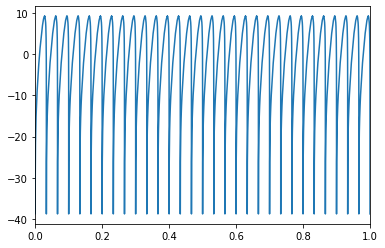

In [86]:
plt.plot(n2,sawtooth_2)
plt.xlim(0, 1)
Audio(sawtooth_2, rate=48000)

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio # We only need the Audio 'Class' from this package

def NoiseGenerator(N, a, b):
    
    # generate a array of N which is  random values between a and b
    x=(b-a)*np.random.random_sample(N)+ a
    
    return x


x=NoiseGenerator(48000, -1, 1)
# BIG N is length of x or noise generator
N=len(x)

sr=48000


print("x=", x)


x= [-0.80435773  0.01280532  0.1097952  ...  0.4621837   0.7517581
  0.27364101]


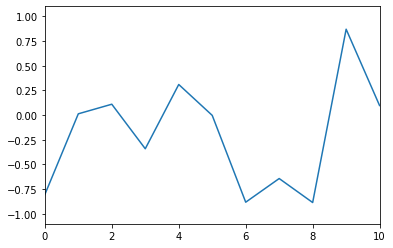

In [91]:
plt.plot(x)
plt.xlim(0, 10)
display(Audio(data=x, rate=48000))

In [92]:
def antialias_freq(fs, overtone, freq):
    
    if (freq*overtone>fs/2):
        print("filtered")
        return freq*fs/2
    else: 
        print("normal")
        return freq*overtone
        
fs=48000
num_overtones = 20
freq=1500
phase=0
duration=2
A=20

n = np.arange(0,duration,1/fs)   #1/48000
sawtooth_2 = np.zeros(duration * fs)
                  
                  
for k in range(1, (num_overtones+1)*2,1):
    #wave =  wave + A * np.cos(2*np.pi*antialias_freq(fs, k, freq)*n + phase)
    sawtooth_2 =  sawtooth_2 - A / k * np.sin(2*np.pi*antialias_freq(fs, k, freq)*n+ phase)
                
print (sawtooth_2)

Audio(data=sawtooth_2, rate=fs)
   

normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
normal
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
filtered
[  0.         -35.0547874  -24.47703624 ...  27.54305827  24.47703712
  35.0547882 ]
